스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[[14.26615846 -8.25067366]]
[22  0]
[24, 1]
[[13.11866097 -9.88309196]]
[23  0]
[25, 1]
[[14.34738234 -9.6847078 ]]
[24  0]
[26, 1]
[[15.79546107 -8.83772309]]
[24  0]
[27, 1]
[[17.9904719  -8.59689028]]
[26  0]
[28, 1]
[[ 19.55421057 -10.16091544]]
[28 -1]
[29, 1]
[[18.87254263 -9.01268442]]
[27  0]
[30, 1]
[[20.43059425 -9.21184951]]
[28  0]
[31, 1]
[[22.09291429 -8.87151127]]
[29  0]
[32, 1]
[[23.00559752 -9.39747203]]
[31 -1]
[33, 1]
[[ 22.03536058 -10.41349295]]
[31  0]
[34, 1]
[[24.16056621 -9.39246113]]
[32 -1]
[35, 1]
[[ 24.96155535 -10.00888473]]
[33 -1]
[36, 1]
[[ 27.01073632 -10.57872527]]
[35 -2]
[37, 1]
[[27.23178511 -8.0905917 ]]
[34  0]
[38, 1]
[[26.96929939 -6.48285784]]
[34  0]
[39, 1]
[[28.68486171 -8.01798068]]
[36  0]
[40, 1]
[[29.37111606 -8.26463274]]
[36  0]
[41, 1]
[[31.99841347 -9.59330425]]
[39 -2]
[42, 1]
[[ 33.63883986 -10.18068705]]
[40 -3]
[43, 1]
[[ 34.00955132 -10.82690236]]
[41 -3]
[44, 1]
[[34.79775511 -9.5618653 ]]


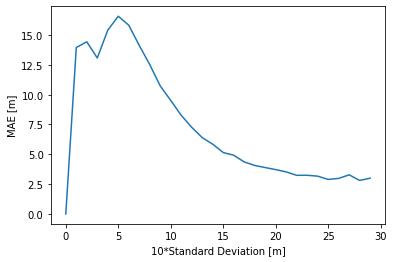

7.271639399018626


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


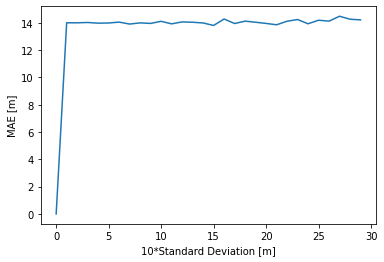

[[13.58497368]]


In [ ]:
import numpy as np  #numpy함수를 np로 부르겠다~
import math
import random
from matplotlib import pyplot as plt

H= np.matrix([[10,10],[110,10],[10,110],[110,110]]) ##matrix함수는 ,하면 enter친 것 처럼 열?이 바뀐다. 옆으로 나열이 아님)
#x= 100*random.random()# 임의의 곳에 우리가 측정해야할 MS를 놓는다.
#y= 100*random.random()
mu=0
size=4 # H의 사이즈. multi함수 밖이기 때문에 Ha의 사이즈가 아니다.
# Hx=b ,zd는 r1,r2,r3,r4

def multi(H,zd) :
  H=H-H[0] # multi함수 내에서 Ha만들 때 H 첫 번째 항 0,0으로 만들기
  Ha=np.delete(H,(0), axis=0) # np.delete(H,(0),axis=0))  (0)은 첫번째 행 삭제, axis=0은  
  r=np.delete(zd,(0), axis=0) # r=[r2, r3, r4..]
  r=np.multiply(r,r)
  K=np.multiply(Ha,Ha)
  K=K.sum(axis=1)
  r1=zd[0]
  r1=np.multiply(r1,r1)
  r1=r1.sum(axis=1)
  b=0.5*(K-r+r1)
  x_hat=(Ha.T*Ha).I*Ha.T*b
  x_hat=np.transpose(x_hat)
  return x_hat # x_hat은 [x,y]

x_hat_kal = np.array([0,0])
def kalman(x_hat, n_std, j, x_tmp):
  dt = 1          # Time Interval
  Q = 0           # Covariance of process noise error
  R = n_std*n_std # Covariance of measurement error
  P = 0.001       # Initialize the error covariance of the predict state 
  ##################   문제   ######################             
  A = np.matrix([[1,dt,0,0],[0,1,0,0],[0,0,1,dt],[0,0,0,1]]) #A는 4x4 x가 4x1
  H = np.matrix([[1,0,0,0],[0,0,1,0]])
  Pkp = A*P*A.T+Q # Predicted Kp state
  if j ==1:
    x = [[0],[1],[1],[0]] #x좌표 x속도 y좌표 y속도
  else:
    x = x_tmp
  xp = A*x # Predicted XKp state
  K = Pkp*H.T*(H*Pkp*H.T+R).I #Kalman Gain
  z = x_hat.T # 측정값. x_hat을 가져와 쓴다.
  x = xp+K*(z-H*xp) # Kalman Gain고려한 새로운 x
  P = Pkp-K*H*Pkp # Kalman Gain고려한 새로운 P
  #x_hat_kal[0] = x[0] #x좌표
  #x_hat_kal[1] = x[2] #y좌표
   # x_hat_kal은 x_hat_global로 초기화, x만 Kalman Filter을 거친 형태로 누적됨.
  x_hat_kal[0]=x[0] # x 좌표
  x_hat_kal[1]=x[2] # y 좌표
  x_tmp = x # x 갱신
  ##################################################
  return x_hat_kal, x_tmp

x_tmp = [[0],[1],[1],[0]]
MAE=[0] # noise로 인한 오차를 1000번의 시행의 오차의 제곱을 다 더하고 제곱씌워 평균을 구함.
MAE_mul = [0]
for i in range(1,30): #시그마를 0.1~3까지 0.1일 때 0.2일 때..를 본다.
  e_cnt=[0] #e-count, n번째 오차를 n행에 넣는다.
  e_mul_cnt = [0]
  for j in range(1,100):
    sigma = i/10
    n=np.random.normal(mu,sigma,size) ## 0 is the mean of the normal distribution you are choosing from
                                    # 1 is the standard deviation of the normal distribution
                                    # 100 is the number of elements you get in array noise
    xm=[j,1] # xm은 좌표 1~100,1까지 이동함
    print(xm)
    zd=xm-H # [[xm-x1,ym-y1], [xm-x2, ym-y2]...
    zd=np.multiply(zd,zd) # 차이제곱
    zd=zd.sum(axis=1) # x2+y2
    zd=np.sqrt(zd) # 비로소 r1 r2 r3
    zd=zd + n.reshape(4,1) #n.reshape는 wk(시스템오차)
    x_hat=multi(H,zd)   #multi 함수 통해 도출한 태그의 좌표 출력
    print(x_hat)
    [x_hat_kal, x_tmp]=kalman(x_hat, sigma, j, x_tmp) # sigma= n_std
    print(x_hat_kal)
    e = xm-x_hat_kal # 오차
    e_mul = xm-x_hat
    e = np.multiply(e,e) # 제곱
    e_mul = np.multiply(e_mul,e_mul)
    e_mul = e_mul.sum(axis = 1)
    e_mul = np.sqrt(e_mul) # 루트
    e_mul_cnt.append(e_mul)
    e=e.sum(axis=0)      # axis = 0(kalman), axis =1(multi)
    e=np.sqrt(e)
    e_cnt.append(e)      #Mean Absolute Error(MAE) 계산
    #print(e)
  MAE_tmp=sum(e_cnt)/100
  MAE_mul_tmp = sum(e_mul_cnt)/100
  MAE_mul.append(MAE_mul_tmp)
  MAE.append(MAE_tmp)
  print(MAE_mul)
#print(MAE) - MAE : kalman 적용 , MAE_mul : kalman 적용 X
plt.plot(range(0,30),MAE)
plt.xlabel('10*Standard Deviation [m]')
plt.ylabel('MAE [m]')
plt.show()
mean_MAE=sum(MAE)/30
print(mean_MAE)
plt.plot(range(0,30),MAE_mul)
plt.xlabel('10*Standard Deviation [m]')
plt.ylabel('MAE [m]')
plt.show()
sum_MAE_mul=sum(MAE_mul)/30
print(sum_MAE_mul)